In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [1]:
#DATASET
df_path= 'Dataset\hypertension_data.csv'

In [3]:
df = pd.read_csv(df_path)

## 1. Exploratory data analysis:
1. Descriptive analysis
2. Data visualization
3. Correlation test (Pearson correlation)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [5]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
# Check apakah ada NULL values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [7]:
df.nunique()

age          88
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

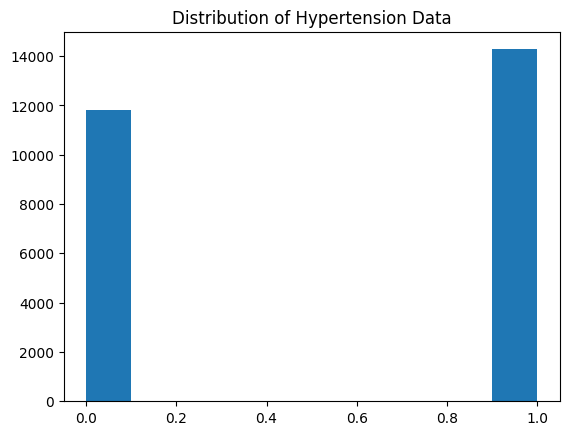

In [35]:
plt.hist(x='target', data=df)
plt.title('Distribution of Hypertension Data')
plt.show()

## 2. Split data untuk training dan testing (80:20).
Index dari data training dan test harus sama ketika digunakan untuk training/testing pada semua algoritma klasifikasi.


In [23]:
# codeblock for split data
X = df.iloc[:,:-1]
y = df['target']

# Bagi dataset menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2


## 3. Metode klasifikasi:
1. Multinomial Naive Bayes
2. SVM
3. Linear Discriminant Analysis
4. Ridge Classifier
5. Logistic Regression

### SVM

In [24]:
#codeblock for classification

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

In [25]:
# Latih model pada data latih
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
# Lakukan prediksi pada data uji
svm_pred = svm_model.predict(X_test)

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=500)

In [30]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [31]:
rfc_pred = rfc_model.predict(X_test)

## 4. Model evaluator:
1. Precision
2. Recall
3. F1-measure

### SVM

In [27]:
#codeblock for evaluator
# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8442791296202953
Recall: 0.8441633122484187
F1-score: 0.8436110908947546


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[1861  476]
 [ 337 2543]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2337
           1       0.84      0.88      0.86      2880

    accuracy                           0.84      5217
   macro avg       0.84      0.84      0.84      5217
weighted avg       0.84      0.84      0.84      5217



### Random Forest Classifier

In [36]:
# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8442791296202953
Recall: 0.8441633122484187
F1-score: 0.8436110908947546


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2337    0]
 [   0 2880]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2337
           1       1.00      1.00      1.00      2880

    accuracy                           1.00      5217
   macro avg       1.00      1.00      1.00      5217
weighted avg       1.00      1.00      1.00      5217



## Save to pickle

In [ ]:
# with open('pickle/svm_model.pkl', 'wb') as file:
#     pickle.dump(svm_model, file)
# with open('pickle/rfc_model.pkl', 'wb') as file:
#     pickle.dump(rfc_model, file)